c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


        Strategy  Accuracy  Precision  Recall
0  most_frequent      80.0   0.000000     0.0
1          prior      80.0   0.000000     0.0
2     stratified      70.0  33.333333    50.0
3        uniform      55.0  14.285714    25.0


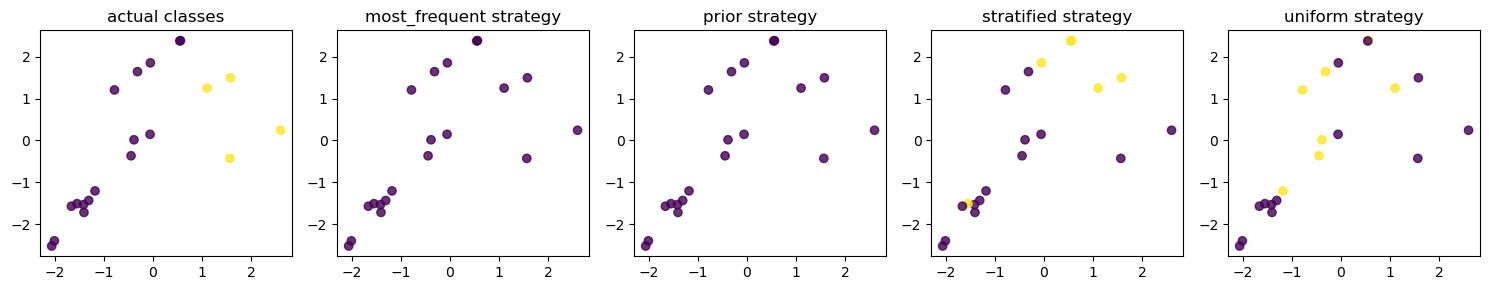

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification

# Generate a synthetic 2D imbalanced dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           weights=[0.70, 0.30], random_state=42)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of strategies
strategies = ['most_frequent', 'prior', 'stratified', 'uniform']

# Create a figure
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Plot the actual test set classes
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8)
axes[0].set_title('actual classes')


# Initialize a list to store the results about metrics for each strategy
results = []

# Loop over the strategies
for idx, strategy in enumerate(strategies):
    dummy_clf = DummyClassifier(strategy=strategy, random_state=42)
    dummy_clf.fit(X_train, y_train)

    # Predict the test set
    y_test_pred = dummy_clf.predict(X_test)

    # Plot the results
    ax = axes[idx + 1]
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='viridis', alpha=0.8)
    ax.set_title(f"{strategy} strategy")

    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_test_pred) * 100
    precision = precision_score(y_test, y_test_pred) * 100
    recall = recall_score(y_test, y_test_pred) * 100

    # Append the results to the list
    results.append({'Strategy': strategy, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

plt.tight_layout()
plt.savefig('dummy_classifier_strategies.png')
plt.show()


**Remark**

Observe the warnings above regarding the precision for the *most_frequent* and *prior* strategies. Precision is not defined for these strategies because the dummy classifiers do not predict any instances as positive in the test set. As a result, the precision is undefined due to division by zero in its calculation. 
